<a href="https://colab.research.google.com/github/Homaoa/Classification-of-a-Bank-Marketing-Data-Set/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
url='/content/bank_marketing_cleaned_data.csv'
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day,Campaign,Pdays,Previous,Poutcome,Emp_var_rate,Cons_price_idx,Cons_conf_idx,Euribor3m,Nr_employed,Decision
0,0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      41187 non-null  int64  
 1   Age             41187 non-null  int64  
 2   Job             41187 non-null  object 
 3   Marital         41187 non-null  object 
 4   Education       41187 non-null  object 
 5   Default         41187 non-null  object 
 6   Housing         41187 non-null  object 
 7   Loan            41187 non-null  object 
 8   Contact         41187 non-null  object 
 9   Month           41187 non-null  object 
 10  Day             41187 non-null  object 
 11  Campaign        41187 non-null  int64  
 12  Pdays           41187 non-null  int64  
 13  Previous        41187 non-null  int64  
 14  Poutcome        41187 non-null  object 
 15  Emp_var_rate    41187 non-null  float64
 16  Cons_price_idx  41187 non-null  float64
 17  Cons_conf_idx   41187 non-null 

In [ ]:
#As it was explianed in data cleaning part, Pdays should be categorical, not numeric

In [ ]:
df['Pdays']=df['Pdays'].astype('object')

In [ ]:
#Variable Decision takes yes and no. I replace those with 1 and 0

In [ ]:
df['Decision']=df['Decision'].apply(lambda x:str(x).replace('"no"','0'))
df['Decision']=df['Decision'].apply(lambda x:str(x).replace('"yes"','1'))
df['Decision'].value_counts()

0    36547
1     4640
Name: Decision, dtype: int64

In [ ]:
############## Numeric Variables

In [ ]:
#I use the describe method to better understand the numeric variables. This gives us an understanding of the central tendencies of the data 

In [ ]:
df[['Age','Campaign','Previous','Emp_var_rate','Cons_price_idx','Cons_conf_idx','Euribor3m','Nr_employed']].describe()

,Age,Campaign,Previous,Emp_var_rate,Cons_price_idx,Cons_conf_idx,Euribor3m,Nr_employed
count,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.00000
mean,40.023235,2.567582,0.172943,0.081914,93.575635,-40.502350,3.621354,5167.04085
std,10.420032,2.770046,0.494890,1.570968,0.578817,4.627976,1.734421,72.24545
min,17.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.60000
25%,32.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.10000
50%,38.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.00000
75%,47.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.10000
max,98.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.10000


In [ ]:
#Comparing Decision rate across numeric variables 
pd.pivot_table(df,index='Decision',values=['Age','Campaign','Previous','Emp_var_rate','Cons_price_idx','Cons_conf_idx','Euribor3m','Nr_employed'])

,Age,Campaign,Cons_conf_idx,Cons_price_idx,Emp_var_rate,Euribor3m,Nr_employed,Previous
Decision,,,,,,,,
0,39.910253,2.633075,-40.592817,93.603725,0.248912,3.811567,5176.172416,0.132350
1,40.913147,2.051724,-39.789784,93.354386,-1.233448,2.123135,5095.115991,0.492672


In [ ]:
#Distributions for all the numeric variables

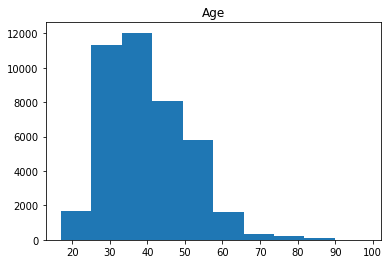

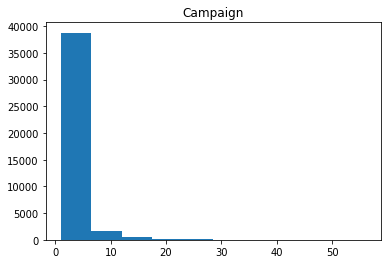

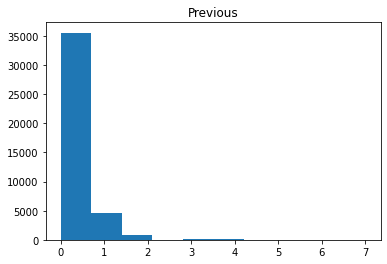

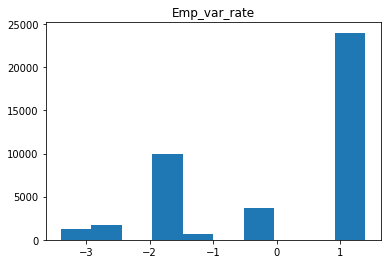

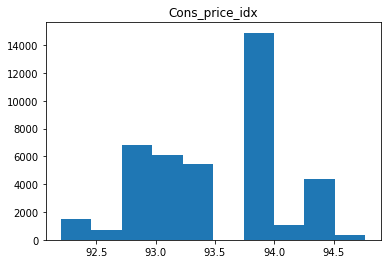

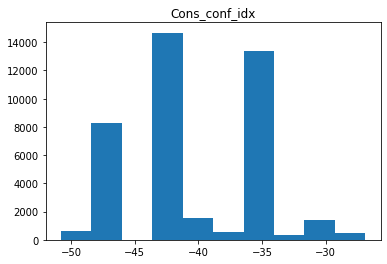

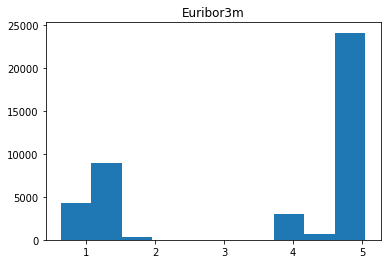

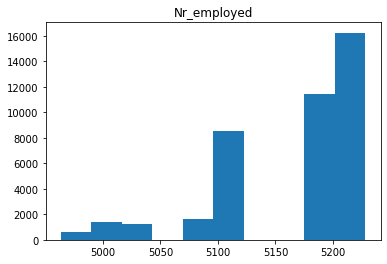

In [ ]:
num=df[['Age','Campaign','Previous','Emp_var_rate','Cons_price_idx','Cons_conf_idx','Euribor3m','Nr_employed']]
for i in num.columns:
  plt.hist(num[i])
  plt.title(i)
  plt.show()

In [ ]:
#Now I use ANOVA to obtain f score for variable Decision and each numeric variable
#When f score is big, it means there is correlation between that numeric variable and Decision

In [ ]:
from scipy import stats
df_anova=df[['Decision','Age']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Age'],grouped_anova.get_group('0')['Age'])
print(anova_results)

F_onewayResult(statistic=38.17450048125443, pvalue=6.529669058807116e-10)


In [ ]:
df_anova=df[['Decision','Campaign']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Campaign'],grouped_anova.get_group('0')['Campaign'])
print(anova_results)

F_onewayResult(statistic=182.14547545808375, pvalue=2.0190737656122594e-41)


In [ ]:
df_anova=df[['Decision','Previous']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Previous'],grouped_anova.get_group('0')['Previous'])
print(anova_results)

F_onewayResult(statistic=2304.67930089819, pvalue=0.0)


In [ ]:
df_anova=df[['Decision','Emp_var_rate']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Emp_var_rate'],grouped_anova.get_group('0')['Emp_var_rate'])
print(anova_results)

F_onewayResult(statistic=4023.999266105272, pvalue=0.0)


In [ ]:
df_anova=df[['Decision','Cons_price_idx']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Cons_price_idx'],grouped_anova.get_group('0')['Cons_price_idx'])
print(anova_results)

F_onewayResult(statistic=778.4475224254741, pvalue=9.994553842013405e-170)


In [ ]:
df_anova=df[['Decision','Cons_conf_idx']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Cons_conf_idx'],grouped_anova.get_group('0')['Cons_conf_idx'])
print(anova_results)

F_onewayResult(statistic=124.33480975301164, pvalue=7.826755200302955e-29)


In [ ]:
df_anova=df[['Decision','Euribor3m']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Euribor3m'],grouped_anova.get_group('0')['Euribor3m'])
print(anova_results)

F_onewayResult(statistic=4310.047651881237, pvalue=0.0)


In [ ]:
df_anova=df[['Decision','Nr_employed']]
grouped_anova=df_anova.groupby(['Decision'])
anova_results=stats.f_oneway(grouped_anova.get_group('1')['Nr_employed'],grouped_anova.get_group('0')['Nr_employed'])
print(anova_results)

F_onewayResult(statistic=5928.724350733113, pvalue=0.0)


In [ ]:
### Result : variables that have higher f score have more correlation with our target which is Decision
#These variables are : Nr_employed, Euribor3m, Emp_var_rate, Previous, Cons_price_idx
#What these variables represent: number of employees, euribor 3 month rate, employment variation rate, number of contacts performed before this campaign and for this client, 
#consumer price index

In [ ]:
############## Categorical Variables

In [ ]:
#Distributions for all the categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


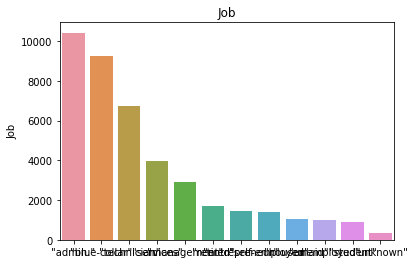

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


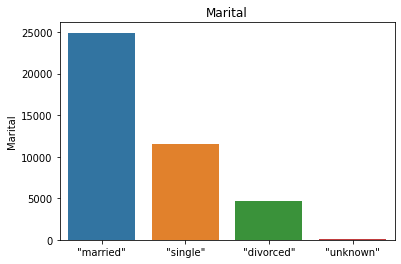

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


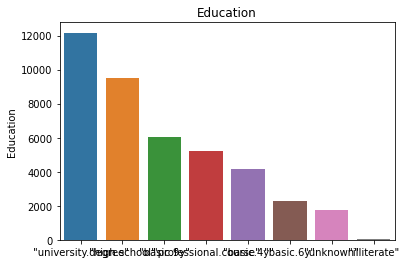

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


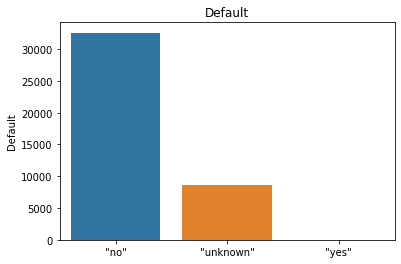

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


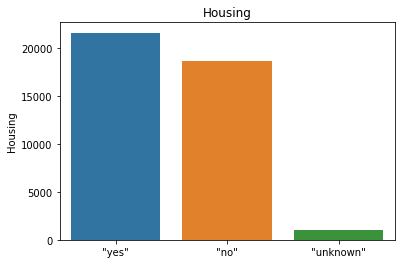

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


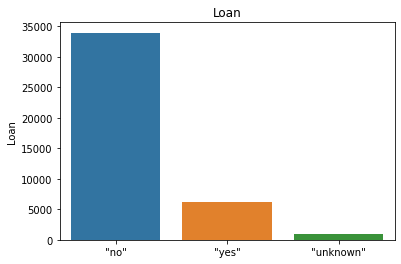

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


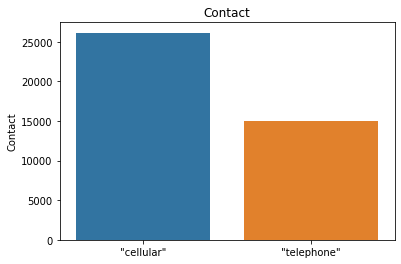

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


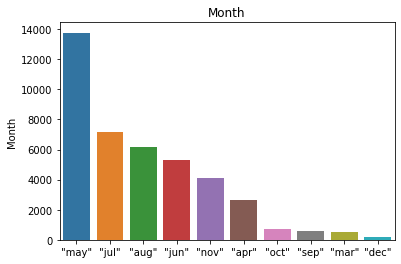

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


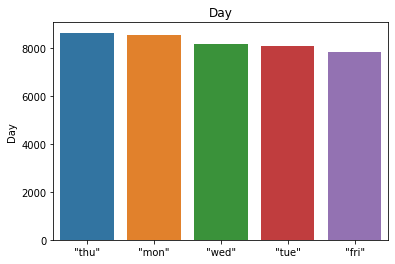

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


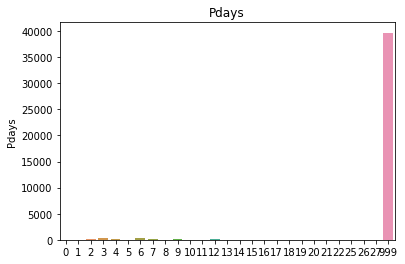

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


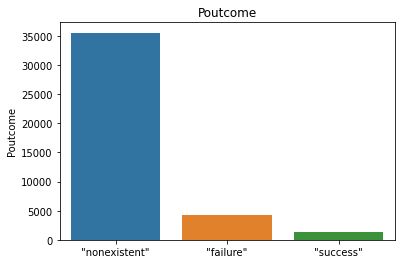

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


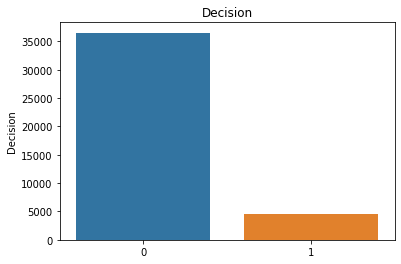

In [ ]:
cat=df[['Job','Marital','Education','Default','Housing','Loan','Contact','Month','Day','Pdays','Poutcome','Decision']]
for i in cat.columns:
  sns.barplot(cat[i].value_counts().index,cat[i].value_counts()).set_title(i)
  plt.show()

In [ ]:
#Comparing Decision and each of the categorical variables
#To do this, I obtain pivot table for each categorical variable against Decision, and then I calculate p value
#if p value is less than alpha, the categorical variable and Decision are dependent

In [ ]:
pd.pivot_table(df,index='Decision',columns='Job',values='Unnamed: 0',aggfunc='count')

Job,"""admin.""","""blue-collar""","""entrepreneur""","""housemaid""","""management""","""retired""","""self-employed""","""services""","""student""","""technician""","""unemployed""","""unknown"""
Decision,,,,,,,,,,,,
0,9070,8616,1332,954,2596,1285,1272,3646,600,6013,870,293
1,1352,638,124,106,328,434,149,323,275,730,144,37


In [ ]:
data=[[9070,8616,1332,954,2596,1285,1272,3646,600,6013,870,293],[1352,638,124,106,328,434,149,323,275,730,144,37]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.286955310674044e-199
Dependent (reject H0)


In [ ]:
pd.pivot_table(df,index='Decision',columns='Marital',values='Unnamed: 0',aggfunc='count')

Marital,"""divorced""","""married""","""single""","""unknown"""
Decision,,,,
0,4136,22395,9948,68
1,476,2532,1620,12


In [ ]:
data=[[4136,22395,9948,68],[476,2532,1620,12]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.0952162613748647e-26
Dependent (reject H0)


In [ ]:
pd.pivot_table(df,index='Decision',columns='Education',values='Unnamed: 0',aggfunc='count')

Education,"""basic.4y""","""basic.6y""","""basic.9y""","""high.school""","""illiterate""","""professional.course""","""university.degree""","""unknown"""
Decision,,,,,,,,
0,3748,2104,5572,8484,14,4647,10498,1480
1,428,188,473,1031,4,595,1670,251


In [31]:
data=[[3748,2104,5572,8484,14,4647,10498,1480],[428,188,473,1031,4,595,1670,251]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 3.3087221879914e-38
Dependent (reject H0)


In [32]:
pd.pivot_table(df,index='Decision',columns='Default',values='Unnamed: 0',aggfunc='count')

Default,"""no""","""unknown""","""yes"""
Decision,,,
0,28390.0,8154.0,3.0
1,4197.0,443.0,NaN


In [33]:
data=[[28390,8154,3],[4197,443,0]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 5.084201777808559e-89
Dependent (reject H0)


In [34]:
pd.pivot_table(df,index='Decision',columns='Housing',values='Unnamed: 0',aggfunc='count')

Housing,"""no""","""unknown""","""yes"""
Decision,,,
0,16596,883,19068
1,2026,107,2507


In [35]:
data=[[16596,883,19068],[2026,107,2507]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.05806216685367882
Independent (H0 holds true)


In [36]:
pd.pivot_table(df,index='Decision',columns='Loan',values='Unnamed: 0',aggfunc='count')

Loan,"""no""","""unknown""","""yes"""
Decision,,,
0,30099,883,5565
1,3850,107,683


In [37]:
data=[[30099,883,5565],[3850,107,683]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.5781926540874669
Independent (H0 holds true)


In [38]:
pd.pivot_table(df,index='Decision',columns='Contact',values='Unnamed: 0',aggfunc='count')

Contact,"""cellular""","""telephone"""
Decision,,
0,22290,14257
1,3853,787


In [39]:
data=[[22290,14257],[3853,787]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.471973730411481e-189
Dependent (reject H0)


In [40]:
pd.pivot_table(df,index='Decision',columns='Month',values='Unnamed: 0',aggfunc='count')

Month,"""apr""","""aug""","""dec""","""jul""","""jun""","""mar""","""may""","""nov""","""oct""","""sep"""
Decision,,,,,,,,,,
0,2093,5523,93,6525,4759,270,12883,3684,403,314
1,539,655,89,649,559,276,886,416,315,256


In [41]:
data=[[2093,5523,93,6525,4759,270,12883,3684,403,314],[539,655,89,649,559,276,886,416,315,256]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [44]:
pd.pivot_table(df,index='Decision',columns='Day',values='Unnamed: 0',aggfunc='count')

Day,"""fri""","""mon""","""thu""","""tue""","""wed"""
Decision,,,,,
0,6980,7667,7578,7137,7185
1,846,847,1045,953,949


In [45]:
data=[[6980,7667,7578,7137,7185],[846,847,1045,953,949]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.9731201830848005e-05
Dependent (reject H0)


In [46]:
pd.pivot_table(df,index='Decision',columns='Pdays',values='Unnamed: 0',aggfunc='count')

Pdays,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,999
Decision,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.0,18.0,24.0,141.0,55.0,17.0,123.0,20.0,6.0,29.0,22.0,13.0,32.0,8.0,9.0,8.0,5.0,6.0,3.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,35999.0
1,10.0,8.0,37.0,298.0,63.0,29.0,289.0,40.0,12.0,35.0,30.0,15.0,26.0,28.0,11.0,16.0,6.0,2.0,4.0,1.0,NaN,2.0,2.0,1.0,1.0,1.0,3673.0


In [47]:
data=[[5,18,24,141,55,17,123,20,6,29,22,13,32,8,9,8,5,6,3,2,1,0,1,0,0,0,35999],[10,8,37,298,63,29,289,40,12,35,30,15,26,28,11,16,6,2,4,1,0,2,2,1,1,1,3673]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [48]:
pd.pivot_table(df,index='Decision',columns='Poutcome',values='Unnamed: 0',aggfunc='count')

Poutcome,"""failure""","""nonexistent""","""success"""
Decision,,,
0,3646,32422,479
1,605,3141,894


In [49]:
data=[[3646,32422,479],[605,3141,894]]
stat, p, dof, expected = chi2_contingency(data)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [ ]:
### Result : variables with p value less than alpha have correlation with our target which is Decision
#These variables are : Job, Marital, Education, Default, Contact, Month, Day, Pdays, Poutcome
#What these variables represent: type of job, marital status, education, has credit in default?, contact communication type,  last contact month of year, last contact day of the week, 
#number of days that passed by after the client was last contacted from a previous campaign, outcome of the previous marketing campaign

In [ ]:
#Now I have found the numeric and categorical variables that have correlation with our target, Decision
#I will develop the machine learning models in the next part by these variables